In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('ftlr_data1.csv')
len(data)

24

Text(0,0.5,'price')

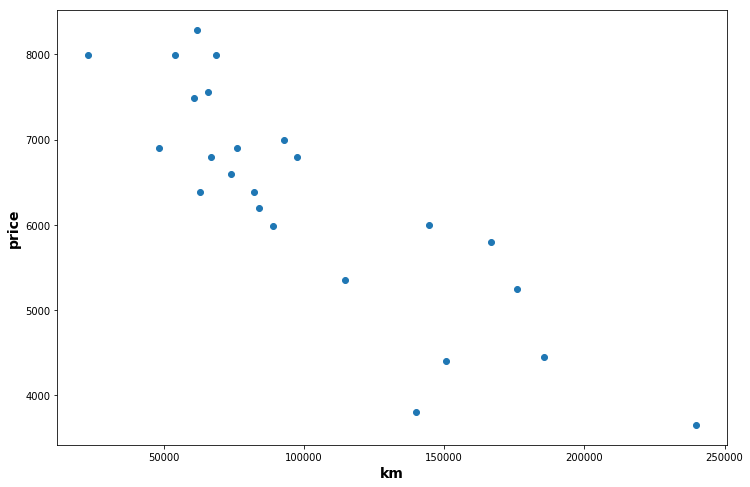

In [3]:
plt.figure(figsize = (12, 8))
plt.scatter(data['km'], data['price'], marker = 'o')
plt.xlabel('km',fontsize='14', fontweight='bold')
plt.ylabel('price', fontsize='14', fontweight='bold')

In [4]:
min(data['km']), max(data['km'])

(22899, 240000)

Feature scaling / data normalization : X = (X - min(X)) / (max(X) - min(X))

In [5]:
data['kmfs'] = (data['km'] - min(data['km'])) / (max(data['km']) - min(data['km']))
data['pricefs'] = (data['price'] - min(data['price'])) / (max(data['price']) - min(data['price']))

In [32]:
data

,km,price,kmfs,pricefs
0,240000,3650,1.000000,0.000000
1,139800,3800,0.538464,0.032328
2,150500,4400,0.587749,0.161638
3,185530,4450,0.749103,0.172414
4,176000,5250,0.705206,0.344828
5,114800,5350,0.423310,0.366379
6,166800,5800,0.662830,0.463362
7,89000,5990,0.304471,0.504310
8,144500,5999,0.560113,0.506250
9,84000,6200,0.281440,0.549569


In [7]:
X = data['kmfs'].values
y = data['pricefs'].values

In [8]:
X, y

(array([ 1.        ,  0.53846366,  0.58774948,  0.74910295,  0.70520633,
         0.42330989,  0.66282974,  0.30447119,  0.56011257,  0.28144044,
         0.27236171,  0.18498763,  0.23537893,  0.34362347,  0.20313587,
         0.24470638,  0.11670144,  0.3228958 ,  0.17526405,  0.19702811,
         0.1432559 ,  0.21004509,  0.        ,  0.17913321]),
 array([ 0.        ,  0.03232759,  0.16163793,  0.17241379,  0.34482759,
         0.36637931,  0.46336207,  0.50431034,  0.50625   ,  0.54956897,
         0.59051724,  0.59051724,  0.63577586,  0.67887931,  0.67887931,
         0.70043103,  0.70043103,  0.71982759,  0.82758621,  0.84159483,
         0.93534483,  0.93534483,  0.93534483,  1.        ]))

Prediction / hypothesis : y = θ1 * X + θ0 

In [9]:
def predict(X, theta):
    return theta[0] + theta[1] * X

In [10]:
predict(X, [0., 0.])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Matrix product

In [11]:
def matprod(M, N):
    return [[sum(lign_1 * lign_2) for lign_1 in N.T] for lign_2 in M]

Cost function J(X, y, θ) = 1/2m * ∑(θ*X - y)^2 (m = number of training datas)

In [12]:
def cost(X, y, theta):
    m = len(X)
    h = predict(X, theta)
    J = (1/(2 * m)) * (sum((h - y)**2))
    return J

Gradient descent (alpha = learning rate)

In [13]:
theta = [0., 0.]
def fit(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = []
    for i in range(num_iters):
        h = predict(X, theta) - y
        theta[0] = theta[0] - (alpha / m) * sum(h)
        theta[1] = theta[1] - (alpha / m) * sum(h * X)
        J_history.append(cost(X,y,theta))
    return theta, J_history

Training until convergence

In [14]:
theta, J_history = fit(X, y, theta, 1, 500)

In [15]:
theta

[0.93931892944579276, -1.0035757423865808]

Text(0.5,1,'error rate')

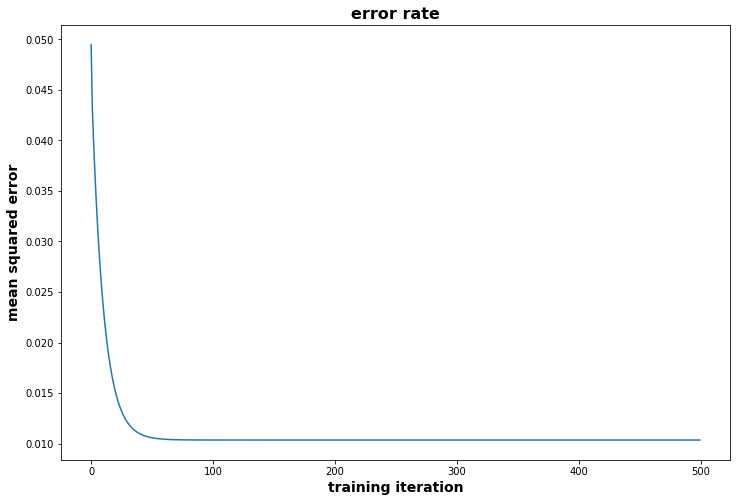

In [27]:
fit = plt.figure(figsize = (12, 8))
ax = plt.axes()
ax.plot(J_history)
plt.xlabel('training iteration',fontsize='14', fontweight='bold')
plt.ylabel('mean squared error', fontsize='14', fontweight='bold')
ax.set_title('error rate', fontsize='16', fontweight='bold')

In [29]:
km = (40000 - min(data['km'])) / (max(data['km']) - min(data['km']))
price = theta[0] + (theta[1] * km)
res = (price * (max(data['price']) - min(data['price']))) + min(data['price'])
print(res)

7641.64110625


In [22]:
def visualize(theta):
    fig = plt.figure(figsize = (12, 8))
    ax = plt.axes()
    ax.set_xlim([15000,250000])
    ax.set_ylim([3100, 8500])
    ax.scatter(data['km'], data['price'])
    plt.xlabel('km',fontsize='14', fontweight='bold')
    plt.ylabel('price', fontsize='14', fontweight='bold')
    ax.set_title('linear regression', fontsize='16', fontweight='bold')
    xx = data['kmfs'].values
    line_x = data['km'].values
    res = theta[0] + theta[1] * xx
    line_y = (res * (max(data['price']) - min(data['price']))) + min(data['price'])
    ax.plot(line_x, line_y, color='green')
    plt.show()

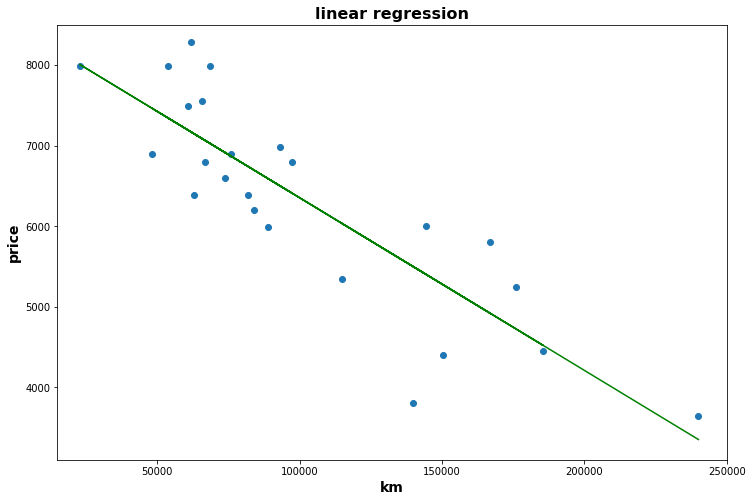

In [23]:
visualize(theta)